# Brain Tumor Object Detecion
* https://www.kaggle.com/datasets/davidbroberts/brain-tumor-object-detection-datasets

In [ ]:
import os, random, cv2, json, shutil
from tqdm import tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import albumentations as A
from albumentations.pytorch import ToTensorV2

## 데이터 탐색

### 1. 데이터셋 다운로드/로드

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download('davidbroberts/brain-tumor-object-detection-datasets')

# print('Path to dataset files:', path)

Path to dataset files: C:\Users\wjddl\.cache\kagglehub\datasets\davidbroberts\brain-tumor-object-detection-datasets\versions\5


### 2. 데이터셋 확인

#### 구조 확인

In [3]:
import os

# 데이터셋 디렉토리 설정
DATASET_DIR = '../data/brain-tumor-detection-with-coco-mri'

In [4]:
# 데이터셋 내부 구조 확인 함수
def print_dataset_structure(path, level=0, max_files=1):
    indent = ' ' * (level * 4)  # 계층 깊이에 따라 들여쓰기
    
    if os.path.isdir(path):  # 폴더인 경우
        print(f'{indent}📂 {os.path.basename(path)}')

        items = sorted(os.listdir(path))  # 정렬해서 보기 좋게 출력
        folders = [item for item in items if os.path.isdir(os.path.join(path, item))]
        files = [item for item in items if os.path.isfile(os.path.join(path, item))]

        # 폴더 출력
        for folder in folders:
            print_dataset_structure(os.path.join(path, folder), level + 1, max_files)

        # 파일은 최대 max_files개만 출력
        if files:
            print(f'{indent}    📄 {files[0]}')
            for file in files[1:max_files]:
                print(f'{indent}    📄 {file}')
            if len(files) > max_files:
                print(f'{indent}    ... ({len(files) - max_files} more files)')

In [5]:
print_dataset_structure(DATASET_DIR)

📂 brain-tumor-detection-with-coco-mri
    📂 axial_t1wce_2_class
        📂 images
            📂 test
                📄 00018_101.jpg
                ... (74 more files)
            📂 train
                📄 00095_170.jpg
                ... (309 more files)
        📂 labels
            📂 test
                📄 00018_101.txt
                ... (74 more files)
            📂 train
                📄 00095_170.txt
                ... (295 more files)
        📄 axial_t1wce_2_class.yaml
        ... (2 more files)
    📂 coronal_t1wce_2_class
        📂 images
            📂 test
                📄 13.jpg
                ... (77 more files)
            📂 train
                📄 100 (2).jpg
                ... (318 more files)
        📂 labels
            📂 test
                📄 13.txt
                ... (77 more files)
            📂 train
                📄 100 (2).txt
                ... (317 more files)
        📄 coronal_t1wce_2_class.yaml
    📂 sagittal_t1wce_2_class
        📂 images
         

#### 이미지 데이터 확인

In [6]:
import random, cv2
import matplotlib.pyplot as plt

DATASET_TYPES = ['axial_t1wce_2_class', 'coronal_t1wce_2_class', 'sagittal_t1wce_2_class']

In [7]:
def print_image_sample(dataset_type, num_sample=5):
    # 이미지 파일 목록 가져오기
    path = DATASET_DIR+'/'+dataset_type+'/images/train'
    image_files = [f for f in os.listdir(path) if f.endswith('.jpg')]

    if len(image_files)==0:
        print(f'경로({path})에서 이미지를 찾을 수 없음')
        return
    
    num_sample = min(num_sample, len(image_files))  # 전체 이미지 개수가 더 적을 경우 대비

    # 랜덤 샘플 선택
    sample_images = random.sample(image_files, num_sample)

    # 이미지 시각화
    fig, axes = plt.subplots(1, num_sample, figsize=(15, 5))
    for ax, img_name in zip(axes, sample_images):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR로 읽기 때문에 RGB 변환
        
        ax.imshow(img)
        ax.set_title(img_name)
        ax.axis('off')

    plt.suptitle(dataset_type, size=15)
    plt.show()

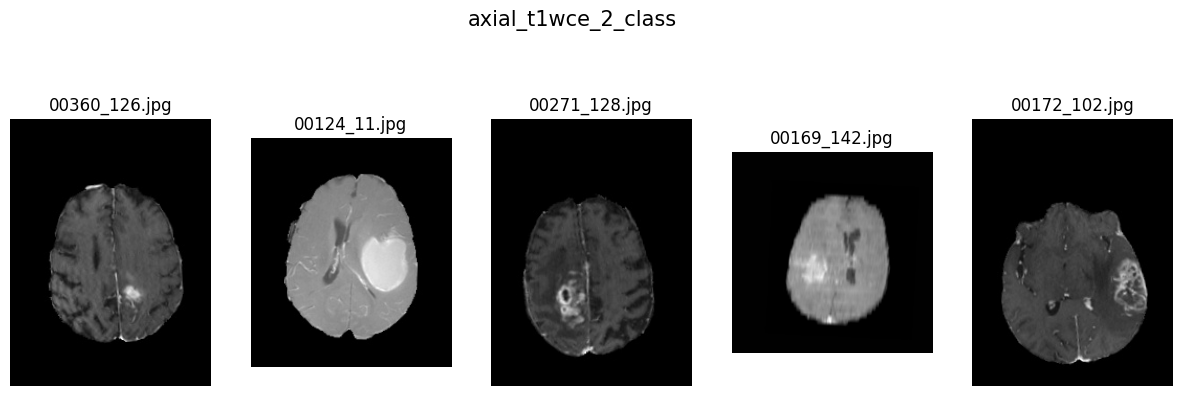

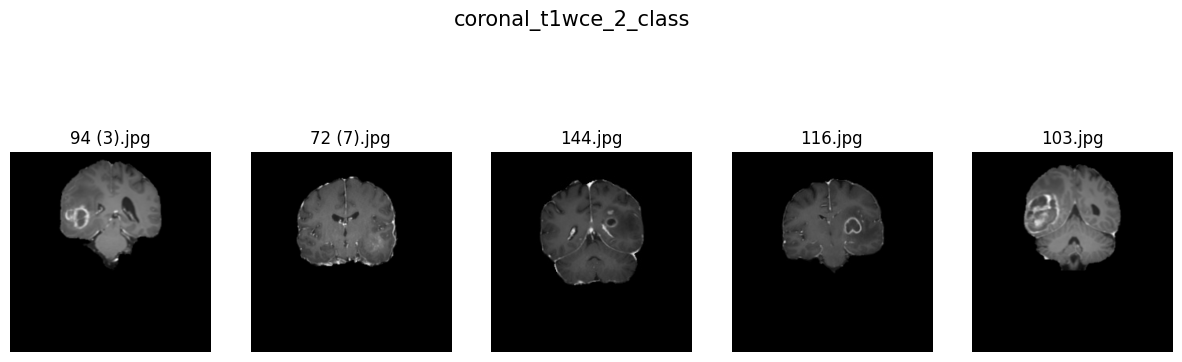

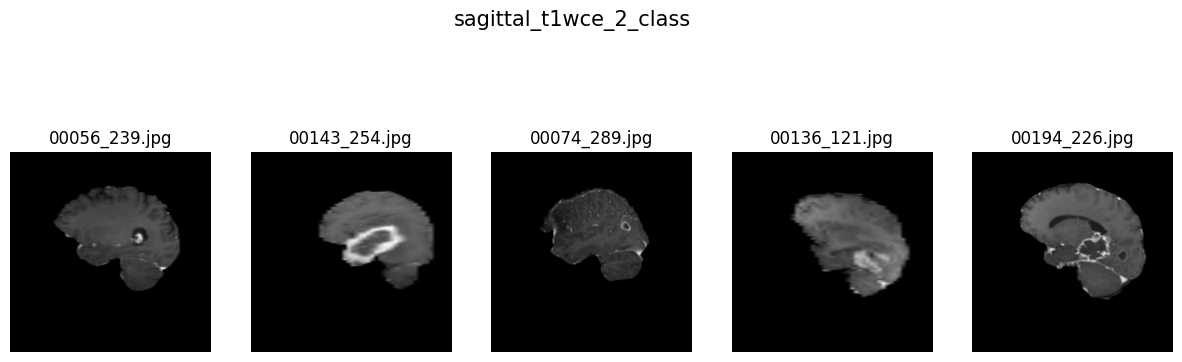

In [8]:
for dataset_type in DATASET_TYPES:
    print_image_sample(dataset_type)

#### 라벨 데이터 확인

In [9]:
def print_label_sample(dataset_type, num_sample=5):
    # 라벨 파일 목록 가져오기
    path = DATASET_DIR+'/'+dataset_type+'/labels/train'
    label_files = [f for f in os.listdir(path) if f.endswith('.txt')]

    if len(label_files)==0:
        print(f'경로({path})에서 라벨 파일을 찾을 수 없음')
        return
    
    num_sample = min(num_sample, len(label_files))  # 전체 파일 개수가 더 적을 경우 대비

    # 랜덤 샘플 선택
    sample_labels = random.sample(label_files, num_sample)

    print(f'\n📂 {dataset_type}\n')
    for label_file in sample_labels:
        label_path = os.path.join(path, label_file)
        
        print(f'📄 파일명: {label_file}')
        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                print('  ', line.strip())  # 각 라벨 줄 출력
        print()
    print('-' * 50)

In [10]:
for dataset_type in DATASET_TYPES:
    print_label_sample(dataset_type)


📂 axial_t1wce_2_class

📄 파일명: 00240_138.txt
   1 0.500000 0.435446 0.140845 0.133803

📄 파일명: 00151_13.txt
   0 0.544601 0.315141 0.352113 0.320423

📄 파일명: 00352_97.txt
   1 0.335681 0.676643 0.143975 0.153756

📄 파일명: 00350_157.txt
   1 0.474961 0.358568 0.078247 0.113850

📄 파일명: 00095_226.txt
   0 0.433099 0.383216 0.192488 0.177230

--------------------------------------------------

📂 coronal_t1wce_2_class

📄 파일명: 95.txt
   0 0.431925 0.291080 0.133803 0.133803

📄 파일명: 72 (11).txt
   1 0.328052 0.264671 0.059859 0.071596

📄 파일명: 90.txt
   0 0.382042 0.240023 0.088028 0.116197

📄 파일명: 77.txt
   0 0.426056 0.288732 0.124413 0.145540

📄 파일명: 71.txt
   0 0.353286 0.265845 0.143192 0.099765

--------------------------------------------------

📂 sagittal_t1wce_2_class

📄 파일명: 00158_289.txt
   0 0.662559 0.448357 0.184272 0.169014

📄 파일명: 00087_185.txt
   1 0.325117 0.219484 0.056338 0.103286

📄 파일명: 00098_247.txt
   1 0.439554 0.573944 0.219484 0.110329

📄 파일명: 00061_184.txt
   0 0.376174

##### class가 0(정상)인데 bbox 좌표가 존재함
>1. 만약 자동으로 bbox 라벨링 해주는 프로그램 등을 사용했다면, 잘못된 라벨링이 됐을 수도 있음
>2. 종양처럼 보이는 무언가가 존재해서 bbox를 잡았지만, 종양이 아닌 정상인 경우가 있을 수 있음!

In [11]:
import pandas as pd

def create_label_dataframe(dataset_type):
    
    data_records = []
    
    for t in ['train', 'test']:
        path = DATASET_DIR+'/'+dataset_type+'/labels/'+t
        label_files = [f for f in os.listdir(path) if f.endswith('.txt')]    

        for label_file in label_files:
            label_path = os.path.join(path, label_file)

            with open(label_path, 'r') as f:
                lines = f.readlines()

            num_lines = len(lines)
            classes = []
            bboxes = []
            
            for line in lines:
                data = line.strip().split()
                class_id = int(data[0])
                bbox = list(map(float, data[1:])) if len(data) > 1 else [0.0, 0.0, 0.0, 0.0]
                
                classes.append(class_id)
                bboxes.append(bbox)

            data_records.append({
                'train/test': t,
                'filename': label_file,
                'num_lines': num_lines,
                'classes': classes,
                'bboxes': bboxes
            })

    df_labels = pd.DataFrame(data_records)

    return df_labels

In [12]:
df_labels = create_label_dataframe(DATASET_TYPES[0])
print(df_labels.shape)
df_labels.head()

(371, 5)


,train/test,filename,num_lines,classes,bboxes
0,train,00095_170.txt,1,[0],"[[0.428991, 0.361502, 0.144366, 0.150235]]"
1,train,00095_176.txt,1,[0],"[[0.443075, 0.373826, 0.142019, 0.193662]]"
2,train,00095_188.txt,1,[0],"[[0.424883, 0.376761, 0.215962, 0.248826]]"
3,train,00095_200.txt,1,[0],"[[0.426643, 0.383216, 0.25, 0.25939]]"
4,train,00095_212.txt,1,[0],"[[0.437793, 0.387324, 0.237089, 0.241784]]"


In [13]:
# 하나의 파일에 class_id가 다른 데이터 있는지 확인
print(len(df_labels[df_labels['num_lines']>1]))
df_labels[df_labels['num_lines']>1]

19


,train/test,filename,num_lines,classes,bboxes
34,train,00112_10.txt,2,"[0, 0]","[[0.752113, 0.740023, 0.090141, 0.073944], [0...."
128,train,00246_103.txt,2,"[1, 1]","[[0.422535, 0.623239, 0.12989, 0.105634], [0.3..."
129,train,00246_96.txt,2,"[1, 1]","[[0.423318, 0.648474, 0.169014, 0.125587], [0...."
245,train,00322_121.txt,2,"[1, 1]","[[0.341158, 0.494131, 0.226917, 0.215962], [0...."
246,train,00322_122.txt,2,"[1, 1]","[[0.339593, 0.494718, 0.226917, 0.212441], [0...."
247,train,00322_127.txt,2,"[1, 1]","[[0.35133, 0.490023, 0.203443, 0.212441], [0.6..."
248,train,00322_130.txt,2,"[1, 1]","[[0.364632, 0.492958, 0.167449, 0.192488], [0...."
249,train,00322_134.txt,2,"[1, 1]","[[0.359155, 0.494131, 0.178404, 0.169014], [0...."
250,train,00322_140.txt,2,"[1, 1]","[[0.342723, 0.5, 0.164319, 0.112676], [0.61737..."
254,train,00328_90.txt,2,"[1, 1]","[[0.286385, 0.692488, 0.201878, 0.117371], [0...."


In [14]:
# bbox 정보가 없는 데이터가 있는지 확인 (bbox 정보가 없다면 [0.0, 0.0, 0.0, 0.0])
df_labels[df_labels['bboxes'].apply(lambda x: [0.0, 0.0, 0.0, 0.0] in x)]

,train/test,filename,num_lines,classes,bboxes


#### 이미지+라벨 데이터 확인

In [15]:
import numpy as np

# 클래스 ID에 따른 색상 및 라벨 매핑
CLASS_NAMES = {0: 'Negative', 1: 'Positive'}
CLASS_COLORS = {0: (0, 255, 0), 1: (255, 0, 0)}  # Green for Negative, Red for Positive

def visualize_sample_with_bbox(dataset_type, num_samples=3):
    image_dir = os.path.join(DATASET_DIR, dataset_type, 'images/train')
    label_dir = os.path.join(DATASET_DIR, dataset_type, 'labels/train')
    
    # 이미지 파일 목록 가져오기
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    
    if len(image_files)==0:
        print(f'경로({image_dir})에서 이미지를 찾을 수 없음')
        return
    
    num_samples = min(num_samples, len(image_files))
    sample_images = random.sample(image_files, num_samples)
    
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    
    if num_samples==1:
        axes = [axes]  # 단일 이미지일 경우 리스트로 변환
    
    for ax, img_name in zip(axes, sample_images):
        img_path = os.path.join(image_dir, img_name)
        label_path = os.path.join(label_dir, img_name.replace('.jpg', '.txt'))
        
        # 이미지 로드
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape  # 이미지 크기 가져오기
        
        # 라벨 파일이 존재하면 바운딩 박스 추가
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f.readlines():
                    data = line.strip().split()
                    class_id = int(data[0])  # 클래스 ID
                    x_center, y_center, box_width, box_height = map(float, data[1:5])  # YOLO 포맷

                    # YOLO 좌표를 이미지 픽셀 좌표로 변환
                    x_min = int((x_center - box_width / 2) * w)
                    y_min = int((y_center - box_height / 2) * h)
                    x_max = int((x_center + box_width / 2) * w)
                    y_max = int((y_center + box_height / 2) * h)

                    # 바운딩 박스 그리기
                    color = CLASS_COLORS.get(class_id, (255, 255, 255))  # 기본 흰색
                    label_text = CLASS_NAMES.get(class_id, f'Class {class_id}')
                    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, 2)
                    cv2.putText(img, label_text, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # 이미지 출력
        ax.imshow(img)
        ax.set_title(img_name)
        ax.axis('off')
    
    plt.suptitle(f'{dataset_type} - BBox Visualization', size=15)
    plt.show()

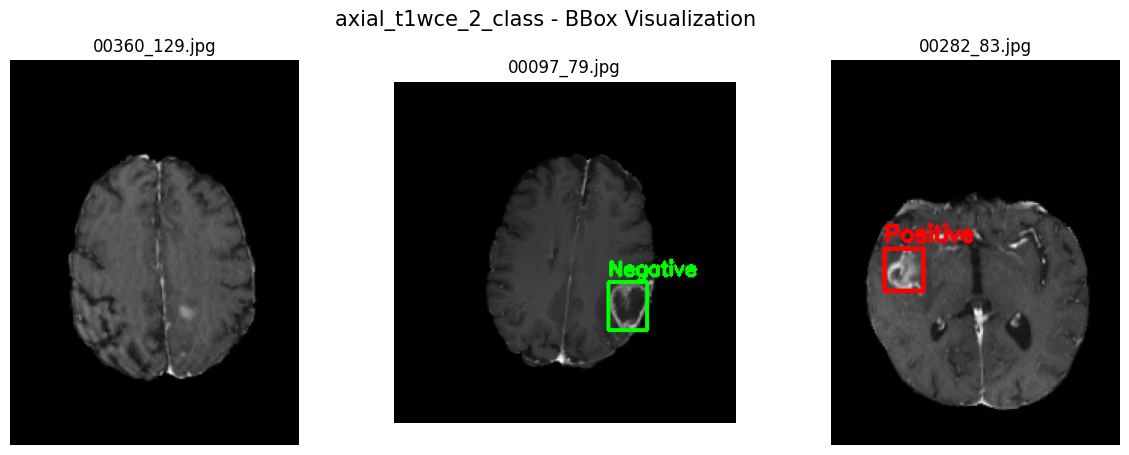

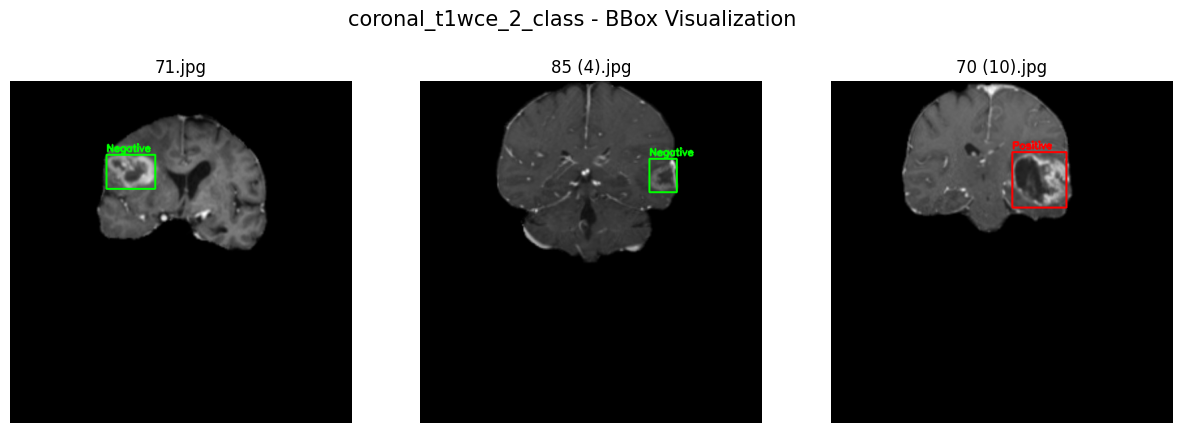

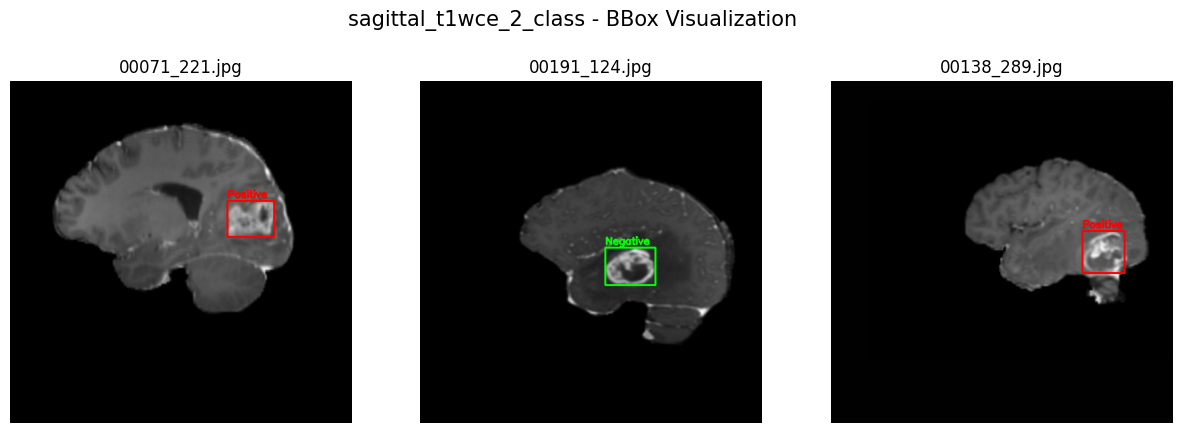

In [16]:
for dataset_type in DATASET_TYPES:
    visualize_sample_with_bbox(dataset_type)

##### 라벨 파일이 없는 이미지 데이터 발견! (ex. 00360_129.jpg)
* 이미지(.jpg)와 라벨(.txt) 파일 모두 있는 데이터만 선별하기

In [19]:
def filter_valid_data(image_dir, label_dir):
    image_files = {f.replace('.jpg', '') for f in os.listdir(image_dir) if f.endswith('.jpg')}
    label_files = {f.replace('.txt', '') for f in os.listdir(label_dir) if f.endswith('.txt')}

    # 이미지와 라벨이 모두 존재하는 경우만 선택
    valid_files = image_files&label_files  # 교집합

    valid_images = [f + '.jpg' for f in valid_files]
    valid_labels = [f + '.txt' for f in valid_files]

    return valid_images, valid_labels

In [20]:
import shutil

def copy_valid_data(image_dir, label_dir, output_image_dir, output_label_dir):
    # 유효한 파일 필터링
    valid_images, valid_labels = filter_valid_data(image_dir, label_dir)

    # 새로운 폴더 생성 (없으면 생성)
    os.makedirs(output_image_dir, exist_ok=True)
    os.makedirs(output_label_dir, exist_ok=True)

    # 이미지 복사
    for img_file in valid_images:
        src_path = os.path.join(image_dir, img_file)
        dst_path = os.path.join(output_image_dir, img_file)
        shutil.copy2(src_path, dst_path)

    # 라벨 복사
    for lbl_file in valid_labels:
        src_path = os.path.join(label_dir, lbl_file)
        dst_path = os.path.join(output_label_dir, lbl_file)
        shutil.copy2(src_path, dst_path)

    print(f'✅ 필터링된 이미지 개수: {len(valid_images)} → {output_image_dir}에 저장 완료')
    print(f'✅ 필터링된 라벨 개수: {len(valid_labels)} → {output_label_dir}에 저장 완료')

In [ ]:
dataset_dir = DATASET_DIR+'/'+DATASET_TYPES[0]  # 'axial_t1wce_2_class' 데이터만 사용

train_image_dir = dataset_dir+'/images/train'
train_label_dir = dataset_dir+'/labels/train'

valid_images, valid_labels = filter_valid_data(train_image_dir, train_label_dir)

print(f'✅ 유효한 이미지 개수: {len(valid_images)}')
print(f'✅ 유효한 라벨 개수: {len(valid_labels)}')

✅ 유효한 이미지 개수: 296
✅ 유효한 라벨 개수: 296


In [22]:
train_output_image_dir = dataset_dir+'/filtered_images/train'
train_output_label_dir = dataset_dir+'/filtered_labels/train'

copy_valid_data(train_image_dir, train_label_dir, train_output_image_dir, train_output_label_dir)

✅ 필터링된 이미지 개수: 296 → ../data/brain-tumor-detection-with-coco-mri/axial_t1wce_2_class/filtered_images/train에 저장 완료
✅ 필터링된 라벨 개수: 296 → ../data/brain-tumor-detection-with-coco-mri/axial_t1wce_2_class/filtered_labels/train에 저장 완료


In [23]:
test_image_dir = dataset_dir+'/images/test'
test_label_dir = dataset_dir+'/labels/test'

valid_images, valid_labels = filter_valid_data(test_image_dir, test_label_dir)

print(f'✅ 유효한 이미지 개수: {len(valid_images)}')
print(f'✅ 유효한 라벨 개수: {len(valid_labels)}')

✅ 유효한 이미지 개수: 75
✅ 유효한 라벨 개수: 75


In [24]:
test_output_image_dir = dataset_dir+'/filtered_images/test'
test_output_label_dir = dataset_dir+'/filtered_labels/test'

copy_valid_data(test_image_dir, test_label_dir, test_output_image_dir, test_output_label_dir)

✅ 필터링된 이미지 개수: 75 → ../data/brain-tumor-detection-with-coco-mri/axial_t1wce_2_class/filtered_images/test에 저장 완료
✅ 필터링된 라벨 개수: 75 → ../data/brain-tumor-detection-with-coco-mri/axial_t1wce_2_class/filtered_labels/test에 저장 완료


In [25]:
def count_files(dir, ext):
    return len([f for f in os.listdir(dir) if f.endswith(ext)])

In [26]:
def compare_data_counts(original_img_dir, original_lbl_dir, filtered_img_dir, filtered_lbl_dir):
    # 기존 데이터 개수
    orig_img_count = count_files(original_img_dir, '.jpg')
    orig_lbl_count = count_files(original_lbl_dir, '.txt')

    # 필터링된 데이터 개수
    filt_img_count = count_files(filtered_img_dir, '.jpg')
    filt_lbl_count = count_files(filtered_lbl_dir, '.txt')

    # 비교 결과 출력
    print('기존 데이터셋 개수:')
    print(f'   - 이미지: {orig_img_count}')
    print(f'   - 라벨: {orig_lbl_count}')
    
    print('\n필터링된 데이터셋 개수:')
    print(f'   - 이미지: {filt_img_count}')
    print(f'   - 라벨: {filt_lbl_count}')
    
    print('\n제거된 데이터셋 개수:')
    print(f'   - 이미지: {orig_img_count - filt_img_count}')
    print(f'   - 라벨: {orig_lbl_count - filt_lbl_count}')

In [27]:
# train
compare_data_counts(train_image_dir, train_label_dir, train_output_image_dir, train_output_label_dir)

기존 데이터셋 개수:
   - 이미지: 310
   - 라벨: 296

필터링된 데이터셋 개수:
   - 이미지: 296
   - 라벨: 296

제거된 데이터셋 개수:
   - 이미지: 14
   - 라벨: 0


In [28]:
# test
compare_data_counts(test_image_dir, test_label_dir, test_output_image_dir, test_output_label_dir)

기존 데이터셋 개수:
   - 이미지: 75
   - 라벨: 75

필터링된 데이터셋 개수:
   - 이미지: 75
   - 라벨: 75

제거된 데이터셋 개수:
   - 이미지: 0
   - 라벨: 0


### 3. 라벨 데이터 변환
* .txt (YOLO) -> .json (COCO)

In [30]:
import json

def convert_yolo_to_coco(dataset_path, dataset_type, output_json):
    '''
    YOLO 형식의 라벨을 COCO JSON 형식으로 변환하는 함수

    Args:
        dataset_path (str): 데이터셋 루트 경로
        dataset_type (str): 변환할 데이터셋 타입 ('train' 또는 'test')
        output_json (str): 생성할 COCO JSON 파일 경로
    '''
    images = []
    annotations = []
    categories = [
        {'id': 0, 'name': 'negative'},
        {'id': 1, 'name': 'tumor'}
    ]

    # 데이터 경로 설정
    images_dir = os.path.join(dataset_path, 'filtered_images', dataset_type)
    labels_dir = os.path.join(dataset_path, 'filtered_labels', dataset_type)

    image_id = 0
    annotation_id = 0

    # 모든 이미지 파일 탐색
    for image_filename in os.listdir(images_dir):
        if not image_filename.endswith('.jpg'):
            continue

        # 이미지 정보 로드
        image_path = os.path.join(images_dir, image_filename)
        image = cv2.imread(image_path)
        height, width, _ = image.shape

        # 이미지 정보 COCO 형식으로 추가
        images.append({
            'id': image_id,
            'file_name': image_filename,
            'width': width,
            'height': height
        })

        # 라벨 파일 경로
        label_filename = image_filename.replace('.jpg', '.txt')
        label_path = os.path.join(labels_dir, label_filename)

        # 바운딩 박스 정보 추가
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f.readlines():
                    data = line.strip().split()
                    class_id = int(data[0])
                    x_center, y_center, bbox_width, bbox_height = map(float, data[1:5])

                    # YOLO → COCO (절대 좌표 변환)
                    x_min = (x_center - bbox_width / 2) * width
                    y_min = (y_center - bbox_height / 2) * height
                    bbox_width *= width
                    bbox_height *= height

                    # COCO 형식의 annotation 추가
                    annotations.append({
                        'id': annotation_id,
                        'image_id': image_id,
                        'category_id': class_id,  # class 0과 1 모두 포함
                        'bbox': [x_min, y_min, bbox_width, bbox_height],
                        'area': bbox_width * bbox_height,
                        'iscrowd': 0
                    })
                    annotation_id += 1

        image_id += 1

    # COCO JSON 저장
    coco_json = {
        'images': images,
        'annotations': annotations,
        'categories': categories
    }

    with open(dataset_path+'/'+output_json, 'w') as f:
        json.dump(coco_json, f, indent=4)

    print(f'✅ {dataset_type} 데이터셋 변환 완료: {output_json}')

In [31]:
convert_yolo_to_coco(dataset_dir, 'train', 'coco_json_train.json')
convert_yolo_to_coco(dataset_dir, 'test', 'coco_json_test.json')

✅ train 데이터셋 변환 완료: coco_json_train.json
✅ test 데이터셋 변환 완료: coco_json_test.json


In [32]:
train_json_path = dataset_dir+'/coco_json_train.json'
test_json_path = dataset_dir+'/coco_json_test.json'

with open(train_json_path, 'r') as f:
    train_json_data = json.load(f)
with open(test_json_path, 'r') as f:
    test_json_data = json.load(f)

# COCO JSON 구조 확인
print('COCO Train 데이터셋 정보')
print('이미지 개수:', len(train_json_data['images']))
print('주석(바운딩 박스) 개수:', len(train_json_data['annotations']))
print('클래스 정보:', train_json_data['categories'])

print('\nCOCO Test 데이터셋 정보')
print('이미지 개수:', len(test_json_data['images']))
print('주석(바운딩 박스) 개수:', len(test_json_data['annotations']))
print('클래스 정보:', test_json_data['categories'])


COCO Train 데이터셋 정보
이미지 개수: 296
주석(바운딩 박스) 개수: 309
클래스 정보: [{'id': 0, 'name': 'negative'}, {'id': 1, 'name': 'tumor'}]

COCO Test 데이터셋 정보
이미지 개수: 75
주석(바운딩 박스) 개수: 81
클래스 정보: [{'id': 0, 'name': 'negative'}, {'id': 1, 'name': 'tumor'}]


In [33]:
import matplotlib.patches as patches

# 시각화 (이미지+bbox)
def visualize_coco_sample(json_path, image_dir, num_samples=3):
    with open(json_path, 'r') as f:
        coco_data = json.load(f)

    sample_images = random.sample(coco_data['images'], num_samples)

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    if num_samples==1:
        axes = [axes]

    for ax, img_info in zip(axes, sample_images):
        img_path = os.path.join(image_dir, img_info['file_name'])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img_info['height'], img_info['width']

        ax.imshow(img)
        ax.set_title(img_info['file_name'])
        ax.axis('off')

        # 해당 이미지의 annotation 가져오기
        image_id = img_info['id']
        annotations = [ann for ann in coco_data['annotations'] if ann['image_id']==image_id]

        # 바운딩 박스 추가
        for ann in annotations:
            x, y, bbox_w, bbox_h = ann['bbox']
            class_id = ann['category_id']
            label = coco_data['categories'][class_id]['name']
            color = 'red' if class_id==1 else 'green'

            rect = patches.Rectangle((x, y), bbox_w, bbox_h, linewidth=2, edgecolor=color, facecolor='none')
            ax.add_patch(rect)
            ax.text(x, y - 5, label, color=color, fontsize=12, backgroundcolor='white')

    plt.show()

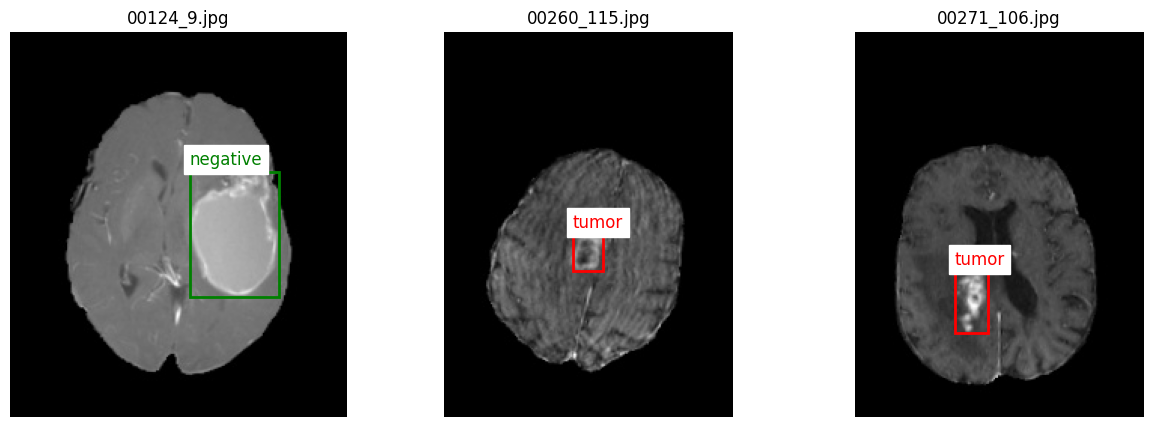

In [ ]:
# train sample
visualize_coco_sample(train_json_path, train_output_image_dir)

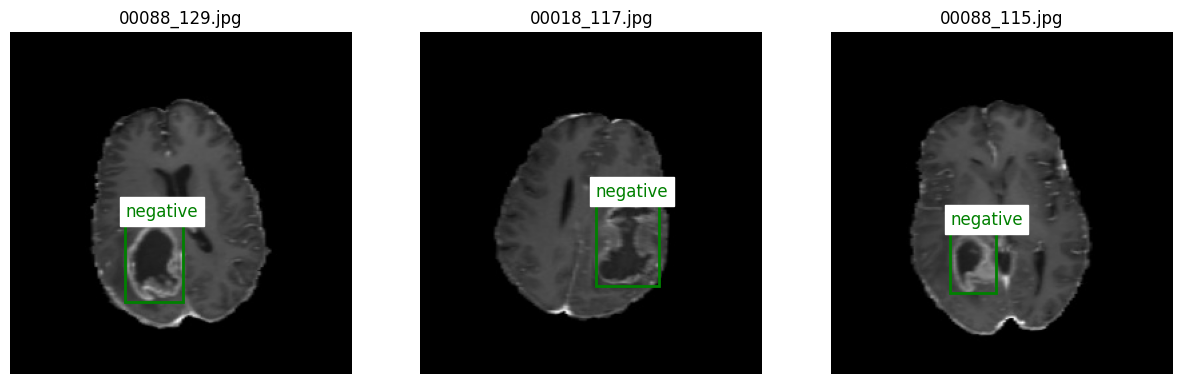

In [35]:
# test sample
visualize_coco_sample(test_json_path, test_output_image_dir)

## 데이터 전처리

### 4. 기본
* 크기 조절 (resizing)
* RGB 변환 (Grayscale -> RGB)
* 대비/밝기 조절 (CLAHE 적용)
* 이상 데이터 확인

In [39]:
train_image_dir = dataset_dir+'/filtered_images/train'
test_image_dir = dataset_dir+'/filtered_images/test'

train_prep_image_dir = dataset_dir+'/preprocessed_images/train'
test_prep_image_dir = dataset_dir+'/preprocessed_images/test'

#### 1) 크기 조절

In [40]:
from tqdm import tqdm

def resize_images(input_dir, output_dir, size=(512, 512)):
    os.makedirs(output_dir, exist_ok=True)

    for img_file in tqdm(os.listdir(input_dir)):
        if img_file.endswith('.jpg'):
            img_path = os.path.join(input_dir, img_file)
            img = cv2.imread(img_path)

            if img is None:
                print(f'{img_file} 를 불러올 수 없음')
                continue

            resized_img = cv2.resize(img, size)
            save_path = os.path.join(output_dir, img_file)
            cv2.imwrite(save_path, resized_img)

    print(f'✅ 모든 이미지가 {size} 크기로 리사이징 완료!')

In [41]:
# train
resize_images(train_image_dir, train_prep_image_dir, size=(512, 512))

# test
resize_images(test_image_dir, test_prep_image_dir, size=(512, 512))

100%|██████████| 296/296 [00:00<00:00, 323.64it/s]


✅ 모든 이미지가 (512, 512) 크기로 리사이징 완료!


100%|██████████| 75/75 [00:00<00:00, 372.31it/s]

✅ 모든 이미지가 (512, 512) 크기로 리사이징 완료!


#### 2) RGB 변환

In [42]:
def convert_to_rgb(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    for img_file in tqdm(os.listdir(input_dir)):
        if img_file.endswith('.jpg'):
            img_path = os.path.join(input_dir, img_file)
            img = cv2.imread(img_path)

            if len(img.shape)==2 or img.shape[2]==1:  # Grayscale이면 변환
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

            save_path = os.path.join(output_dir, img_file)
            cv2.imwrite(save_path, img)

    print(f'✅ 흑백 이미지를 RGB로 변환 완료!')

In [43]:
# train
convert_to_rgb(train_prep_image_dir, train_prep_image_dir)

# test
convert_to_rgb(test_prep_image_dir, test_prep_image_dir)

100%|██████████| 296/296 [00:08<00:00, 33.38it/s]


✅ 흑백 이미지를 RGB로 변환 완료!


100%|██████████| 75/75 [00:02<00:00, 32.45it/s]

✅ 흑백 이미지를 RGB로 변환 완료!


#### 3) 대비/밝기 조절

In [44]:
def apply_clahe(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    for img_file in tqdm(os.listdir(input_dir)):
        if img_file.endswith('.jpg'):
            img_path = os.path.join(input_dir, img_file)
            img = cv2.imread(img_path)

            lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # LAB 색공간으로 변환
            l, a, b = cv2.split(lab)
            l = clahe.apply(l)  # L 채널에 CLAHE 적용
            lab = cv2.merge((l, a, b))

            enhanced_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # 다시 BGR 변환
            save_path = os.path.join(output_dir, img_file)
            cv2.imwrite(save_path, enhanced_img)

    print(f'✅ CLAHE 대비 조절 완료!')

In [45]:
# train
apply_clahe(train_prep_image_dir, train_prep_image_dir)

# test
apply_clahe(test_prep_image_dir, test_prep_image_dir)

100%|██████████| 296/296 [00:02<00:00, 103.03it/s]


✅ CLAHE 대비 조절 완료!


100%|██████████| 75/75 [00:00<00:00, 108.19it/s]

✅ CLAHE 대비 조절 완료!


#### 4) 이상 데이터 확인

* 잘못된 라벨 데이터 확인 및 수정
>* bbox 좌표가 이미지 크기를 벗어나는 경우
>* bbox 크기가 너무 작은 경우 등
* 이미지-라벨 데이터셋 최종 매칭 검증

In [ ]:
def check_invalid_labels(image_dir, label_dir):
    invalid_labels = []  # 잘못된 라벨 파일 리스트

    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            label_path = os.path.join(label_dir, label_file)
            image_path = os.path.join(image_dir, label_file.replace('.txt', '.jpg'))

            if not os.path.exists(image_path):
                print(f'❌ {label_file}에 해당하는 이미지가 없음!')
                continue

            with open(label_path, 'r') as f:
                lines = f.readlines()

            for line in lines:
                data = line.strip().split()
                if len(data) < 5:  # 클래스 ID + bbox 좌표 (5개 요소가 있어야 함)
                    print(f'❌ {label_file}: 잘못된 형식의 데이터 → {data}')
                    invalid_labels.append(label_file)
                    continue

                class_id = int(data[0])
                bbox = list(map(float, data[1:5]))

                # 바운딩 박스 크기가 너무 작은 경우
                if bbox[2] * bbox[3] < 0.0001:
                    print(f'❌ {label_file}: 너무 작은 바운딩 박스 → {bbox}')
                    invalid_labels.append(label_file)

    print(f'✅ 검토 완료! 총 {len(invalid_labels)}개의 잘못된 라벨 파일 발견')
    
    return invalid_labels

In [ ]:
# train
check_invalid_labels(train_prep_image_dir, train_output_label_dir)

✅ 검토 완료! 총 0개의 잘못된 라벨 파일 발견


[]

In [ ]:
# test
check_invalid_labels(test_prep_image_dir, test_output_label_dir)

✅ 검토 완료! 총 0개의 잘못된 라벨 파일 발견


[]

In [50]:
def check_matching_data(image_dir, label_dir):
    images = {f.split('.')[0] for f in os.listdir(image_dir) if f.endswith('.jpg')}
    labels = {f.split('.')[0] for f in os.listdir(label_dir) if f.endswith('.txt')}

    only_images = images - labels  # 라벨이 없는 이미지
    only_labels = labels - images  # 이미지가 없는 라벨

    print(f'총 이미지 개수: {len(images)}')
    print(f'총 라벨 개수: {len(labels)}')
    print(f'❌ 라벨이 없는 이미지 개수: {len(only_images)}')
    print(f'❌ 이미지가 없는 라벨 개수: {len(only_labels)}')

    return only_images, only_labels

In [51]:
# train
only_images, only_labels = check_matching_data(train_prep_image_dir, train_output_label_dir)

총 이미지 개수: 296
총 라벨 개수: 296
❌ 라벨이 없는 이미지 개수: 0
❌ 이미지가 없는 라벨 개수: 0


In [52]:
# test
only_images, only_labels = check_matching_data(test_prep_image_dir, test_output_label_dir)

총 이미지 개수: 75
총 라벨 개수: 75
❌ 라벨이 없는 이미지 개수: 0
❌ 이미지가 없는 라벨 개수: 0


#### 5) 이미지 전처리 비교

In [55]:
def compare_images(original_dir, processed_dir, num_samples=5):
    original_images = [f for f in os.listdir(original_dir) if f.endswith('.jpg')]

    sample_images = random.sample(original_images, min(num_samples, len(original_images)))

    fig, axes = plt.subplots(len(sample_images), 2, figsize=(10, 5 * len(sample_images)))

    for i, img_name in enumerate(sample_images):
        original_path = os.path.join(original_dir, img_name)
        processed_path = os.path.join(processed_dir, img_name)

        original_img = cv2.imread(original_path)
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

        processed_img = cv2.imread(processed_path)
        if processed_img is None:
            print(f'⚠ {img_name}의 전처리된 파일이 없음!')
            continue
        processed_img = cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB)


        axes[i, 0].imshow(original_img)
        axes[i, 0].set_title(f'Original: {img_name}')
        axes[i, 0].axis('off')

        axes[i, 1].imshow(processed_img)
        axes[i, 1].set_title(f'Precessed: {img_name}')
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

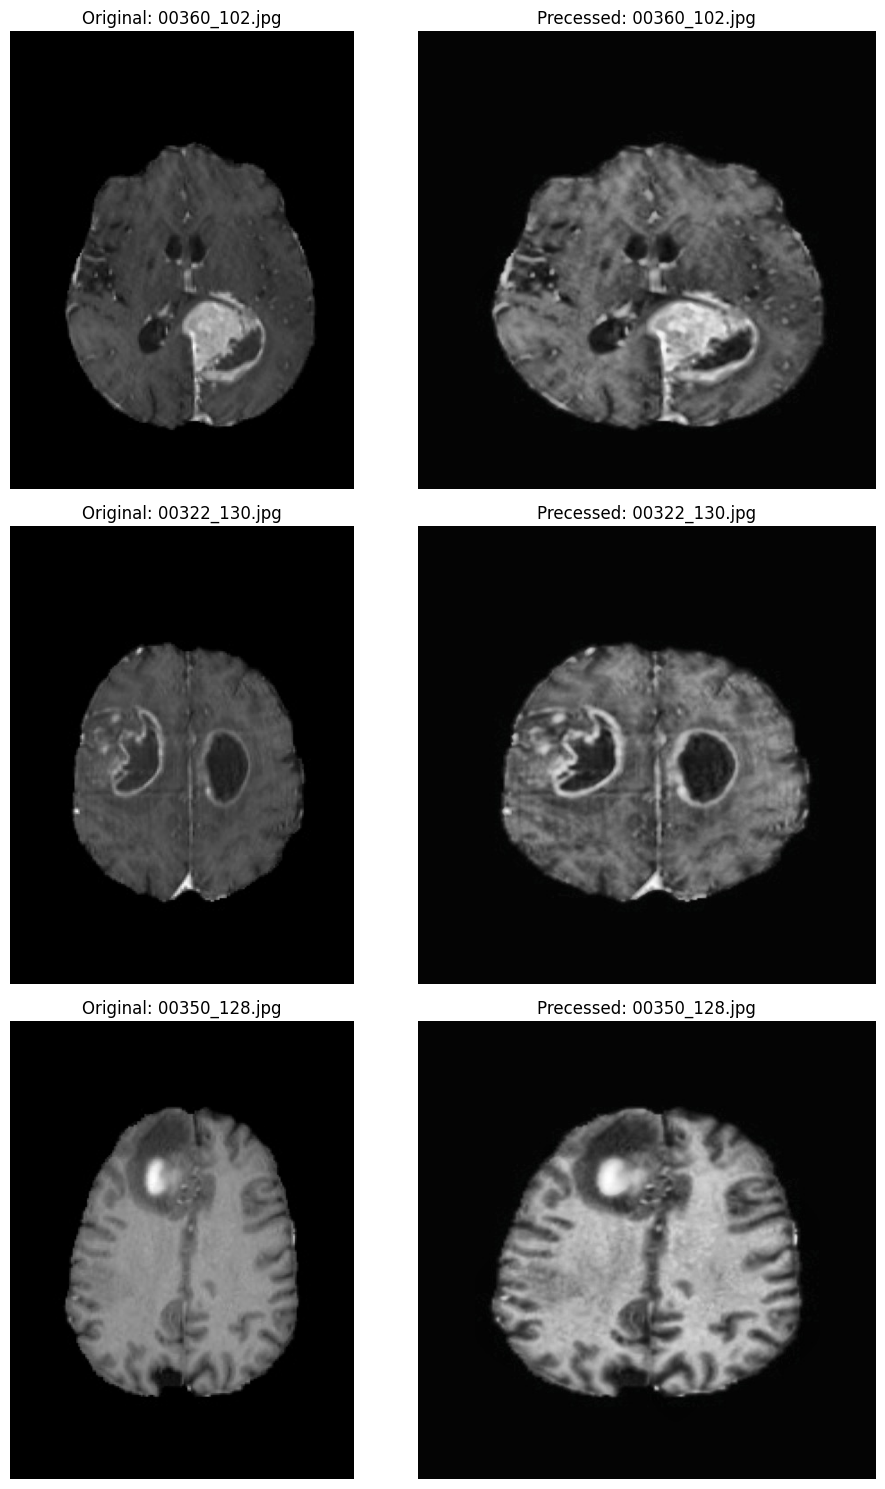

In [57]:
compare_images(train_output_image_dir, train_prep_image_dir, num_samples=3)

### 5. 데이터 증강

In [59]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [61]:
# 이미지와 BBox에 동일한 증강 적용
def augment_image(image, bboxes, class_labels):    
    transform = A.Compose([
        A.HorizontalFlip(p=0.5),  # 좌우 반전
        A.RandomRotate90(p=0.3),  # 90도 회전 (랜덤)
        A.Rotate(limit=10, p=0.5),  # -10도 ~ 10도 랜덤 회전
        A.RandomBrightnessContrast(p=0.3),  # 밝기 대비 조정
        A.RandomScale(scale_limit=0.1, p=0.3),  # 랜덤 확대/축소 (90%~110%)
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

    augmented = transform(image=image, bboxes=bboxes, class_labels=class_labels)
    
    return augmented['image'], augmented['bboxes'], augmented['class_labels']

In [62]:
# 데이터셋을 증강하여 저장 (YOLO 형식 유지)
def augment_dataset(image_dir, label_dir, output_image_dir, output_label_dir, num_augments=3):
    os.makedirs(output_image_dir, exist_ok=True)
    os.makedirs(output_label_dir, exist_ok=True)

    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

    for img_file in image_files:
        img_path = os.path.join(image_dir, img_file)
        label_path = os.path.join(label_dir, img_file.replace('.jpg', '.txt'))

        if not os.path.exists(label_path):
            continue

        # 원본 이미지 로드
        image = cv2.imread(img_path)
        h, w, _ = image.shape

        # YOLO 라벨 로드
        with open(label_path, 'r') as f:
            lines = f.readlines()

        bboxes = []
        class_labels = []
        
        for line in lines:
            data = line.strip().split()
            class_id = int(data[0])
            x_center, y_center, width, height = map(float, data[1:5])
            bboxes.append([x_center, y_center, width, height])
            class_labels.append(class_id)

        # 여러 번 증강 수행
        for i in range(num_augments):
            aug_img, aug_bboxes, aug_class_labels = augment_image(image, bboxes, class_labels)

            # 새로운 파일명 생성
            new_img_name = f'{img_file[:-4]}_aug{i+1}.jpg'
            new_label_name = f'{img_file[:-4]}_aug{i+1}.txt'

            # 증강된 이미지 저장
            cv2.imwrite(os.path.join(output_image_dir, new_img_name), aug_img)

            # 증강된 BBox 저장 (YOLO 형식)
            with open(os.path.join(output_label_dir, new_label_name), 'w') as f:
                for bbox, cls in zip(aug_bboxes, aug_class_labels):
                    f.write(f'{cls} {bbox[0]} {bbox[1]} {bbox[2]} {bbox[3]}\n')

    print(f'✅ 데이터 증강 완료!')

In [69]:
train_image_dir = train_prep_image_dir
train_label_dir = train_output_label_dir

augmented_image_dir = dataset_dir+'/augmented_images/train'
augmented_label_dir = dataset_dir+'/augmented_labels/train'

In [70]:
# 데이터 증강
augment_dataset(train_image_dir, train_label_dir, augmented_image_dir, augmented_label_dir, num_augments=3)

✅ 데이터 증강 완료!


In [74]:
augmented_image_cnt = count_files(augmented_image_dir, '.jpg')
augmented_label_cnt = count_files(augmented_label_dir, '.txt')

print('증강된 이미지 개수:', augmented_image_cnt)
print('증강된 라벨 개수:', augmented_label_cnt)

증강된 이미지 개수: 888
증강된 라벨 개수: 888


In [75]:
# 원본 데이터 추가
def copy_original_to_augmented(original_image_dir, original_label_dir, augmented_image_dir, augmented_label_dir):
    
    # 원본 이미지 복사
    for img_file in os.listdir(original_image_dir):
        if img_file.endswith('.jpg'):
            src = os.path.join(original_image_dir, img_file)
            dst = os.path.join(augmented_image_dir, img_file)

            if not os.path.exists(dst):  # 중복 방지
                shutil.copy(src, dst)

    # 원본 라벨 복사
    for label_file in os.listdir(original_label_dir):
        if label_file.endswith('.txt'):
            src = os.path.join(original_label_dir, label_file)
            dst = os.path.join(augmented_label_dir, label_file)

            if not os.path.exists(dst):  # 중복 방지
                shutil.copy(src, dst)

    print(f'✅ 원본 데이터가 증강 데이터 폴더에 추가 완료!')

In [76]:
copy_original_to_augmented(
    original_image_dir=train_image_dir, 
    original_label_dir=train_label_dir, 
    augmented_image_dir=augmented_image_dir, 
    augmented_label_dir=augmented_label_dir
)

✅ 원본 데이터가 증강 데이터 폴더에 추가 완료!


In [78]:
total_image_cnt = count_files(augmented_image_dir, '.jpg')
total_label_cnt = count_files(augmented_label_dir, '.txt')

print('데이터셋 전체 이미지 개수:', total_image_cnt)
print('데이터셋 전체 라벨 개수:', total_label_cnt)

데이터셋 전체 이미지 개수: 1184
데이터셋 전체 라벨 개수: 1184


#### COCO json 파일 업데이트

In [82]:
import json

def convert_yolo_to_coco2(dataset_path, dataset_type, output_json):
    images = []
    annotations = []
    categories = [
        {'id': 0, 'name': 'negative'},
        {'id': 1, 'name': 'tumor'}
    ]

    images_dir = os.path.join(dataset_path, 'augmented_images', dataset_type)
    labels_dir = os.path.join(dataset_path, 'augmented_labels', dataset_type)

    image_id = 0
    annotation_id = 0

    # 모든 이미지 파일 탐색
    for image_filename in os.listdir(images_dir):
        if not image_filename.endswith('.jpg'):
            continue

        image_path = os.path.join(images_dir, image_filename)
        image = cv2.imread(image_path)
        height, width, _ = image.shape

        # 이미지 정보 COCO 형식으로 추가
        images.append({
            'id': image_id,
            'file_name': image_filename,
            'width': width,
            'height': height
        })


        label_filename = image_filename.replace('.jpg', '.txt')
        label_path = os.path.join(labels_dir, label_filename)

        # 바운딩 박스 정보 추가
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f.readlines():
                    data = line.strip().split()
                    class_id = int(float(data[0]))
                    x_center, y_center, bbox_width, bbox_height = map(float, data[1:5])

                    # YOLO → COCO (절대 좌표 변환)
                    x_min = (x_center - bbox_width / 2) * width
                    y_min = (y_center - bbox_height / 2) * height
                    bbox_width *= width
                    bbox_height *= height

                    # COCO 형식의 annotation 추가
                    annotations.append({
                        'id': annotation_id,
                        'image_id': image_id,
                        'category_id': class_id,  # class 0과 1 모두 포함
                        'bbox': [x_min, y_min, bbox_width, bbox_height],
                        'area': bbox_width * bbox_height,
                        'iscrowd': 0
                    })
                    annotation_id += 1

        image_id += 1

    # COCO JSON 저장
    coco_json = {
        'images': images,
        'annotations': annotations,
        'categories': categories
    }

    with open(dataset_path+'/'+output_json, 'w') as f:
        json.dump(coco_json, f, indent=4)

    print(f'✅ {dataset_type} 데이터셋 변환 완료: {output_json}')

In [83]:
convert_yolo_to_coco2(dataset_dir, 'train', 'coco_json_aug_train.json')

✅ train 데이터셋 변환 완료: coco_json_aug_train.json


In [84]:
aug_train_json_path = dataset_dir+'/coco_json_aug_train.json'

with open(aug_train_json_path, 'r') as f:
    aug_train_json_data = json.load(f)

print('증강된 COCO Train 데이터셋 정보')
print('이미지 개수:', len(aug_train_json_data['images']))
print('주석(바운딩 박스) 개수:', len(aug_train_json_data['annotations']))
print('클래스 정보:', aug_train_json_data['categories'])

증강된 COCO Train 데이터셋 정보
이미지 개수: 1184
주석(바운딩 박스) 개수: 1236
클래스 정보: [{'id': 0, 'name': 'negative'}, {'id': 1, 'name': 'tumor'}]


## 최종 파일 구성

In [85]:
dataset_dir

'../data/brain-tumor-detection-with-coco-mri/axial_t1wce_2_class'

In [86]:
# 기존 데이터셋 경로
DATASET_DIR = dataset_dir
OLD_TRAIN_IMG_DIR = os.path.join(DATASET_DIR, 'augmented_images/train')
OLD_TRAIN_LBL_DIR = os.path.join(DATASET_DIR, 'augmented_labels/train')
TEST_IMG_DIR = os.path.join(DATASET_DIR, 'filtered_images/test')
TEST_LBL_DIR = os.path.join(DATASET_DIR, 'filtered_labels/test')

# 새로운 데이터셋 경로 (final 폴더 생성)
FINAL_DIR = os.path.join(DATASET_DIR, 'final')
FINAL_TRAIN_IMG_DIR = os.path.join(FINAL_DIR, 'images/train')
FINAL_TRAIN_LBL_DIR = os.path.join(FINAL_DIR, 'labels/train')
FINAL_VAL_IMG_DIR = os.path.join(FINAL_DIR, 'images/val')
FINAL_VAL_LBL_DIR = os.path.join(FINAL_DIR, 'labels/val')
FINAL_TEST_IMG_DIR = os.path.join(FINAL_DIR, 'images/test')
FINAL_TEST_LBL_DIR = os.path.join(FINAL_DIR, 'labels/test')

# 폴더 생성
os.makedirs(FINAL_TRAIN_IMG_DIR, exist_ok=True)
os.makedirs(FINAL_TRAIN_LBL_DIR, exist_ok=True)
os.makedirs(FINAL_VAL_IMG_DIR, exist_ok=True)
os.makedirs(FINAL_VAL_LBL_DIR, exist_ok=True)
os.makedirs(FINAL_TEST_IMG_DIR, exist_ok=True)
os.makedirs(FINAL_TEST_LBL_DIR, exist_ok=True)

In [87]:
# 기존 train 이미지 목록 가져오기
image_files = [f for f in os.listdir(OLD_TRAIN_IMG_DIR) if f.endswith('.jpg')]

# 80:20 비율로 나누기
num_val = int(len(image_files) * 0.2)
val_files = random.sample(image_files, num_val)
train_files = [f for f in image_files if f not in val_files]

In [89]:
# Train 데이터 이동
for img_file in train_files:
    shutil.copy(os.path.join(OLD_TRAIN_IMG_DIR, img_file), os.path.join(FINAL_TRAIN_IMG_DIR, img_file))
    label_file = img_file.replace('.jpg', '.txt')
    if os.path.exists(os.path.join(OLD_TRAIN_LBL_DIR, label_file)):
        shutil.copy(os.path.join(OLD_TRAIN_LBL_DIR, label_file), os.path.join(FINAL_TRAIN_LBL_DIR, label_file))

# Validation 데이터 이동
for img_file in val_files:
    shutil.copy(os.path.join(OLD_TRAIN_IMG_DIR, img_file), os.path.join(FINAL_VAL_IMG_DIR, img_file))
    label_file = img_file.replace('.jpg', '.txt')
    if os.path.exists(os.path.join(OLD_TRAIN_LBL_DIR, label_file)):
        shutil.copy(os.path.join(OLD_TRAIN_LBL_DIR, label_file), os.path.join(FINAL_VAL_LBL_DIR, label_file))

In [90]:
print(f'✅ Train 데이터셋: {len(train_files)}개')
print(f'✅ Validation 데이터셋: {len(val_files)}개')

✅ Train 데이터셋: 948개
✅ Validation 데이터셋: 236개


In [91]:
# Test 데이터 복사
for img_file in os.listdir(TEST_IMG_DIR):
    shutil.copy(os.path.join(TEST_IMG_DIR, img_file), os.path.join(FINAL_TEST_IMG_DIR, img_file))
    label_file = img_file.replace('.jpg', '.txt')
    if os.path.exists(os.path.join(TEST_LBL_DIR, label_file)):
        shutil.copy(os.path.join(TEST_LBL_DIR, label_file), os.path.join(FINAL_TEST_LBL_DIR, label_file))

print(f'✅ Test 데이터셋: {len(os.listdir(TEST_IMG_DIR))}개')

✅ Test 데이터셋: 75개


In [92]:
yaml_path = os.path.join(FINAL_DIR, 'yolo_final.yaml')

# 새로운 YAML 설정
yaml_content = """\
path: ./
train: images/train
val: images/val
test: images/test

# Classes
nc: 2
names: ['negative', 'tumor']
"""

# YAML 파일 저장
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

In [96]:
def convert_yolo_to_coco3(dataset_path, dataset_type, output_json):
    images = []
    annotations = []
    categories = [
        {'id': 0, 'name': 'negative'},
        {'id': 1, 'name': 'tumor'}
    ]

    images_dir = os.path.join(dataset_path, 'images', dataset_type)
    labels_dir = os.path.join(dataset_path, 'labels', dataset_type)

    image_id = 0
    annotation_id = 0

    for image_filename in os.listdir(images_dir):
        if not image_filename.endswith('.jpg'):
            continue

        image_path = os.path.join(images_dir, image_filename)
        image = cv2.imread(image_path)
        height, width, _ = image.shape

        images.append({
            'id': image_id,
            'file_name': image_filename,
            'width': width,
            'height': height
        })

        label_filename = image_filename.replace('.jpg', '.txt')
        label_path = os.path.join(labels_dir, label_filename)

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f.readlines():
                    data = line.strip().split()
                    class_id = int(float(data[0]))
                    x_center, y_center, bbox_width, bbox_height = map(float, data[1:5])

                    x_min = (x_center - bbox_width / 2) * width
                    y_min = (y_center - bbox_height / 2) * height
                    bbox_width *= width
                    bbox_height *= height

                    annotations.append({
                        'id': annotation_id,
                        'image_id': image_id,
                        'category_id': class_id,  # class 0과 1 모두 포함
                        'bbox': [x_min, y_min, bbox_width, bbox_height],
                        'area': bbox_width * bbox_height,
                        'iscrowd': 0
                    })
                    annotation_id += 1

        image_id += 1

    coco_json = {
        'images': images,
        'annotations': annotations,
        'categories': categories
    }

    json_path = os.path.join(dataset_path, output_json)
    with open(json_path, 'w') as f:
        json.dump(coco_json, f, indent=4)

    print(f'✅ {dataset_type} 데이터셋 COCO 변환 완료: {json_path}')

In [97]:
convert_yolo_to_coco3(FINAL_DIR, 'train', 'coco_final_train.json')
convert_yolo_to_coco3(FINAL_DIR, 'val', 'coco_final_val.json')
convert_yolo_to_coco3(FINAL_DIR, 'test', 'coco_final_test.json')

✅ train 데이터셋 COCO 변환 완료: ../data/brain-tumor-detection-with-coco-mri/axial_t1wce_2_class\final\coco_final_train.json
✅ val 데이터셋 COCO 변환 완료: ../data/brain-tumor-detection-with-coco-mri/axial_t1wce_2_class\final\coco_final_val.json
✅ test 데이터셋 COCO 변환 완료: ../data/brain-tumor-detection-with-coco-mri/axial_t1wce_2_class\final\coco_final_test.json


In [98]:
def check_coco_json(json_path):
    if not os.path.exists(json_path):
        print(f'{json_path} 파일을 찾을 수 없음!')
        return
    
    with open(json_path, 'r') as f:
        coco_data = json.load(f)
    
    # 데이터 개수 확인
    num_images = len(coco_data.get('images', []))
    num_annotations = len(coco_data.get('annotations', []))
    num_categories = len(coco_data.get('categories', []))

    print(f'📂 COCO JSON 파일: {json_path}')
    print(f'🔹 이미지 개수: {num_images}')
    print(f'🔹 주석(바운딩 박스) 개수: {num_annotations}')
    print(f'🔹 클래스 개수: {num_categories}')
    
    # 클래스 정보 출력
    print('🔹 클래스 정보:')
    for category in coco_data.get('categories', []):
        print(f"   - ID {category['id']}: {category['name']}")

    # 샘플 이미지 & 바운딩 박스 정보 (3개만)
    print('\n🔹 샘플 이미지 3개:')
    for img in coco_data.get('images', [])[:3]:
        print(f"   - ID: {img['id']}, 파일명: {img['file_name']}, 크기: {img['width']}x{img['height']}")

    print('\n🔹 샘플 바운딩 박스 3개:')
    for ann in coco_data.get('annotations', [])[:3]:
        print(f"   - ID: {ann['id']}, 이미지 ID: {ann['image_id']}, 클래스: {ann['category_id']}, BBox: {ann['bbox']}")

    print('='*50)

In [99]:
# train
check_coco_json(os.path.join(FINAL_DIR, 'coco_final_train.json'))

📂 COCO JSON 파일: ../data/brain-tumor-detection-with-coco-mri/axial_t1wce_2_class\final\coco_final_train.json
🔹 이미지 개수: 948
🔹 주석(바운딩 박스) 개수: 986
🔹 클래스 개수: 2
🔹 클래스 정보:
   - ID 0: negative
   - ID 1: tumor

🔹 샘플 이미지 3개:
   - ID: 0, 파일명: 00095_170.jpg, 크기: 512x512
   - ID: 1, 파일명: 00095_170_aug1.jpg, 크기: 512x512
   - ID: 2, 파일명: 00095_170_aug3.jpg, 크기: 512x512

🔹 샘플 바운딩 박스 3개:
   - ID: 0, 이미지 ID: 0, 클래스: 0, BBox: [182.685696, 146.628864, 73.915392, 76.92032]
   - ID: 1, 이미지 ID: 1, 클래스: 0, BBox: [185.34217607600078, 141.41061383100134, 79.50660781067029, 82.27634105468366]
   - ID: 2, 이미지 ID: 2, 클래스: 0, BBox: [182.68569946289062, 146.6288604736328, 73.91537475585938, 76.92031860351562]


In [100]:
# train
check_coco_json(os.path.join(FINAL_DIR, 'coco_final_val.json'))

📂 COCO JSON 파일: ../data/brain-tumor-detection-with-coco-mri/axial_t1wce_2_class\final\coco_final_val.json
🔹 이미지 개수: 236
🔹 주석(바운딩 박스) 개수: 250
🔹 클래스 개수: 2
🔹 클래스 정보:
   - ID 0: negative
   - ID 1: tumor

🔹 샘플 이미지 3개:
   - ID: 0, 파일명: 00095_170_aug2.jpg, 크기: 550x550
   - ID: 1, 파일명: 00095_176_aug3.jpg, 크기: 465x465
   - ID: 2, 파일명: 00095_188_aug1.jpg, 크기: 512x512

🔹 샘플 바운딩 박스 3개:
   - ID: 0, 이미지 ID: 0, 클래스: 0, BBox: [203.11114611169634, 146.08352559571588, 91.99799854004748, 94.64632297389208]
   - ID: 1, 이미지 ID: 1, 클래스: 0, BBox: [128.80267649888992, 173.01045030355453, 90.05282431840897, 66.03885054588318]
   - ID: 2, 이미지 ID: 2, 클래스: 0, BBox: [239.17307209418834, 129.1859799025928, 110.6955556443211, 127.50567501563361]


In [101]:
# train
check_coco_json(os.path.join(FINAL_DIR, 'coco_final_test.json'))

📂 COCO JSON 파일: ../data/brain-tumor-detection-with-coco-mri/axial_t1wce_2_class\final\coco_final_test.json
🔹 이미지 개수: 75
🔹 주석(바운딩 박스) 개수: 81
🔹 클래스 개수: 2
🔹 클래스 정보:
   - ID 0: negative
   - ID 1: tumor

🔹 샘플 이미지 3개:
   - ID: 0, 파일명: 00018_101.jpg, 크기: 256x256
   - ID: 1, 파일명: 00018_109.jpg, 크기: 256x256
   - ID: 2, 파일명: 00018_111.jpg, 크기: 256x256

🔹 샘플 바운딩 박스 3개:
   - ID: 0, 이미지 ID: 0, 클래스: 0, BBox: [134.91072, 152.037504, 42.96704, 34.554112]
   - ID: 1, 이미지 ID: 0, 클래스: 0, BBox: [141.82156799999998, 129.802752, 23.436544, 16.22528]
   - ID: 2, 이미지 ID: 1, 클래스: 0, BBox: [136.713472, 126.79808, 39.66208, 20.131328]
